# Анализ данных, суррогатное моделирование и оптимизция в прикладных задачах #

## Аннотация ##

Прогресс в сфере компьютерной техники и численных методов изменил задачи, с которыми сталкиваются современные учёные и инженеры, занимающиеся проектированием сложных технических систем.
Например, расчёт аэродинамики самолёта с требуемой для практики точностью в настоящее время может быть проведен менее чем за один час.
В результате, всё больше усилий исследователей направлено не на получение данных о характеристиках проектируемой системы, а на их анализ, интерпретацию и использование.

Предлагаемый курс посвящён методам интеллектуального анализа данных и машинного обучения, применяемым при проектировании технических систем, а также лежащим в основе этих методов разделам математики: линейной алгебре и математической статистики.
В программе содержится краткое изложение классических курсов по этим разделам, а также дополнительные главы, такие как сингулярное разложение матриц или случайные процессы.
Среди методов машинного обучения рассматриваются метод главных компонент, метод наименьших квадратов, линейная регрессия, гребневая регрессия и др.
Отдельный большой блок посвящён гауссовским процессам, а также основанным на них методам суррогатного моделирования и оптимизации.
Все рассматриваемые методы реализованы на языке Питон, а их применение проиллюстрировано на примере решения задач, взятых из реальной практики аэродинамического проектирования.

Курс ориентирован на студентов 4-го и 5-го курсов, обучающихся по специальностям &laquo;Прикладные математика и физика&raquo; и &laquo;Прикладная математика и информатика&raquo;.

---

## Содержание курса ##

1. Введение
1. Основные сведения из линейной алгебры
   - Умножение матриц (4 способа)
   - [Собственные числа и вектора]()
   - [СЛАУ]()
   - [Сингулярное разложение матриц]()
   - [Псевдорешения и псевдообратные матрицы]()
1. Основные сведения из теории вероятностей
   - [Общая теория вероятностей]()
   - [Непрерывная]()
   - [Многомерное распределение Гаусса]()
1. [Методы оптимизации]()
1. [Линейная регрессия]()
1. Гауссовые процессы
   - [Случайные процессы]()
   - [Гауссовы случайные процессы]()
   - [Регрессия]()
   - [Алгоритм эффективной глобальной оптимизации]()

---

## Введение ##

Альтернативным названием данного курса является &laquo;Методы машинного обучения и их применение в прикладных задачах аэродинамики&raquo;.
Моя цель дать краткий обзор тех методов машинного обучения, которые мы (Отдел вычислительной аэродинамики Отделения аэродинамики силовых установок ЦАГИ) применяем в задачах аэродинамического проектирования, и привести несколько примеров таких задач.

В основе этого курса лежит достаточно много литературы (несколько десятков источников). Многие части текста взяты из этой литературы напрямую или переведены с английского. Фактически, в настоящий момент данный курс является компиляцией материалов из различных источников с добавлением кода на Питоне и примеров из практики. Основными источниками явлются:

1. Воронцов К.В. [Математические методы обучения по прецендентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). 141 c.
1. Strang G. Linear algebra and learning from data. Wellesley-Cambridge Press, 2019. 432 p.
1. Ширяев А.Н. Вероятность &mdash; 1. М.: МЦНМО, 2007. 517 с.
1. Материалы авторов [P. Roelants](https://peterroelants.github.io/) и [M. Krasser ](http://krasserm.github.io/).


Должен признаться, что я не спрашивал у авторов разрешение использовать их материалы и делаю это без их разрешения. Я искренне надеюсь, что они не будут в обиде на меня за это. Оправданием мне может служить тот факт, что я делаю это с целью преподавания.

Курсы лекций, находящиеся в открытом доступе:

1. [Линейная алгебра](https://www.youtube.com/watch?v=WNl10xl1QT8&list=PLthfp5exSWEqSRXkZgMMzTSXL_WwMV9wK), к.ф.-м.н. Павел Александрович Кожевников, МФТИ
2. [Теория вероятностей](https://www.youtube.com/watch?v=Q3h9P7lhpNc&list=PLyBWNG-pZKx7kLBRcNW3HXG05BDUrTQVr&index=1), д.ф.-м.н. Максим Евгеньевич Широков, МФТИ
3. [Машинное обучение](https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=1), д.ф.-м.н. Константин Вячеславович Воронцов, ШАД (Яндекс)
4. [Matrix Methods in Data Analysis, Signal Processing, and Machine Learning](https://www.youtube.com/watch?v=Cx5Z-OslNWE&list=PLUl4u3cNGP63oMNUHXqIUcrkS2PivhN3k), prof. Gilbert Strang, MIT

В основе методов машинного обучения лежат линейная алгебра, теория вероятностей и методы оптимизации.
Мы начнём с краткого введения в каждую из этих дисциплин и посвятим этому добрую половину нашего курса.

Но в самом начале будет полезно рассматреть типичную постановку задачи машинного обучения (взято у К.В. Воронцова).

## Три типа машинного обучения ##

**Машинное обучение** (*wikipedia*) — класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи, а обучение в процессе применения решений множества сходных задач. Для построения таких методов используются средства математической статистики, численных методов, методов оптимизации, теории вероятностей, теории графов, различные техники работы с данными в цифровой форме.

Различают три типа машинного обучения: *обучение с учителем*, *обучение без учителя* и *обучение с подкреплением* (*Рашка С.* Python и машинное обучение).

1. **Обучение с учителем** \
Основная задача обучения с учителем состоит в том, чтобы на маркированных *тренировочных данных* построить модель, которая позволит делать прогнозы для ранее не встречавшихся данных. Выделяют две основные задачи: классификация (ответ &mdash; метка принадлежности к классу) и регрессия (ответ &mdash; непрерывная величина).

1. **Обучение без учителя** \
В обучении без учителя мы имеем дело с немаркированными данными или данными с неизвестной структурой.
Используя методы обучения без учителя, мы можем разведать структуру данных с целью выделения содержательной информации без контроля со стороны известной результирующей переменной или функции вознаграждения.
Задачи: кластеризация, снижение размерности.

1. **Обучение с подкреплением** \
В отличии от обучения с учителем, когда мы тренируем нашу модель, зная *правильный ответ* заранее, в обучении с подкреплением мы определяем меру *вознаграждения* за выполненные агентом отдельно взятые действия.

В рамках данного курса мы будем заниматься, в основном, регрессией и оптимизацией на основе регрессии.

> Регрессия &mdash; это наука о том, как провести линию через точки. Это в некотором смысле можно сказать о всём машинном обучении.

In [1]:
# Imports
import sys
import warnings
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm  # Colormaps
import seaborn as sns

sns.set_style('whitegrid')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Styles, fonts
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 12

In [145]:
# Define the data
np.random.seed(42)
# Generate random data
n = 20 # Number of samples
# Underlying relation
# x = np.random.uniform(0, 1, n)  # Independent variable x
X_train = np.linspace(0, 1, n)  # Independent variable x
Y_true = np.sin(10*x)  # Dependent variable
# Noise
e_std = 0.5  # Standard deviation of the noise
err = e_std * np.random.randn(n)  # Noise
# Features and output
Y_train = Y_true + err  # Dependent variable with noise

X_disp = np.linspace(0, 1, 1001)

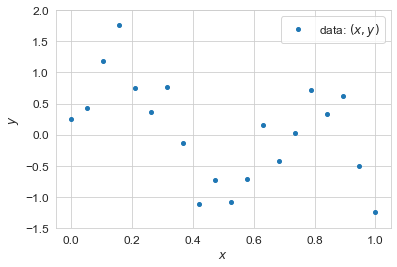

In [169]:
 # Show data
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(X_train, Y_train, 'o', ms=4, label='data: $(x,y)$')
# plt.plot([0, 1], [b, m+b], 'k-', label=f'$y = {b:.0f} + {m:.0f}x$')
plt.xlim((-0.05, 1.05))
plt.ylim((-1.5, 2.0))
plt.xlabel('$x$')
plt.ylabel('$y$')
# plt.title('Noisy data samples from linear line')
plt.legend()
plt.show()

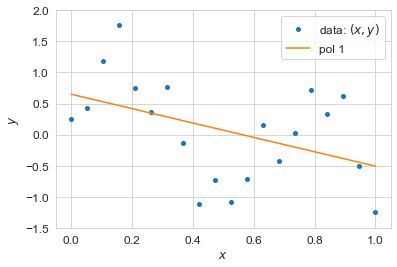

In [170]:
p1 = np.polyfit(X_train, Y_train, 1)
ax.plot(X_disp, np.polyval(p1, X_disp), '-', ms=4, label='model 1')
ax.legend()
display(fig)

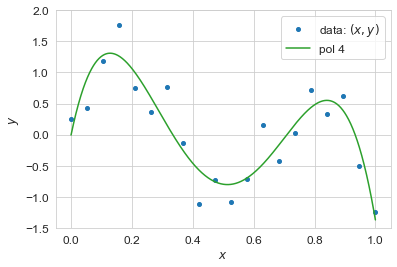

In [171]:
p4 = np.polyfit(X_train, Y_train, 4)
del ax.lines[1]
ax.plot(X_disp, np.polyval(p4, X_disp), '-', ms=4, label='model 2')
ax.legend()
display(fig)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


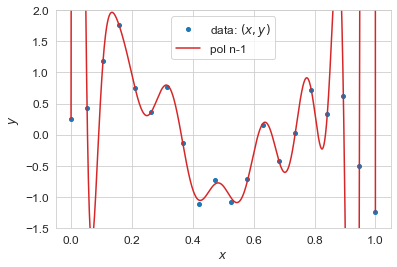

In [172]:
pn = np.polyfit(X_train, Y_train, n-1)
del ax.lines[1]
ax.plot(X_disp, np.polyval(p10, X_disp), '-', ms=4, label='model 3')
ax.legend()
display(fig)

In [151]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

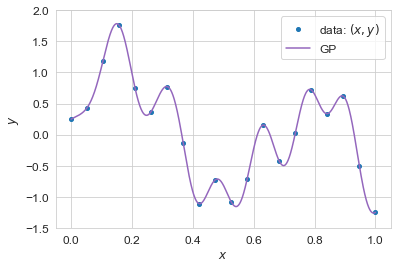

In [173]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, n_restarts_optimizer=20)

# Reuse training data from previous 1D example
gpr.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X_disp.reshape(-1, 1), return_cov=True)

del ax.lines[1]
ax.plot(X_disp, mu_s, '-', ms=4, label='GP')
ax.legend()
display(fig)

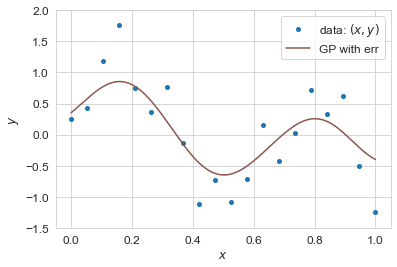

In [174]:
gpr = GaussianProcessRegressor(kernel=rbf, alpha=e_std, n_restarts_optimizer=20)

# Reuse training data from previous 1D example
gpr.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X_disp.reshape(-1, 1), return_cov=True)

del ax.lines[1]
ax.plot(X_disp, mu_s, '-', ms=4, label='GP with err')
ax.legend()
display(fig)

## Постановка задачи ##

**Задача (кратко)**: построить функцию корректно описывающую обучающие данные и обобщающую их на неизвестные (тестовые) данные.

Теперь подробнее.

Пусть задано множество объектов $X$ и множество допустимы ответов $Y$. Мы предполагаем существование зависимости $y:X \rightarrow Y$. При этом значения функции $y_i = y(x_i)$ известны только на конечном подмножестве объектов $\{x_1, \ldots, x_l\} \subset X$.
Пары &laquo;объект&ndash;ответ&raquo; $(x_i, y_i)$ называются *прецендентами*, а совокупность пар $X^l = (x_i, y_i)_{i=1}^l$ &mdash; *обучающей выборкой*.

*Признак* (feature) $f$ объекта $x$ &mdash; это результат измерения некоторой характеристики объекта.

Пусть имеется набор признаков $f_1, \ldots, f_n$.
Вектор $(f_1, \ldots, f_n)$ называют признаковым описанием объекта $x \in X$. В дальнейшем мы не будем различать объекты из $X$ и их признаковые описания.
Совокупность признаковых описаний всех объектов выборки $X_l$, записанную в виде таблицы размера $l \times n$, называют матрицей объектов&ndash;признаков:
$$
  \mathbf{F} = 
  \begin{pmatrix}
    f_1(x_1) & \ldots & f_n(x_1) \\
    \ldots   & \ldots & \ldots   \\
    f_1(x_l) & \ldots & f_n(x_l) \\
  \end{pmatrix}.
$$

Матрица объектов–признаков является стандартным и наиболее распространённым способом представления исходных данных в прикладных задачах.

**Задача**: построить функцию $a: X \rightarrow Y$, аппроксимирующую неизвестную целевую зависимость $y$. Функция должна корректно описывать обучающие данные и должна быть успешно применима для неизвестных тестовых данных.

Простейшим выбором является линейная функция: $y = Ax$.
Элементы матрицы A &mdash; это веса, которые необходимо найти: не так уж сложно.
С линейными функциями приятно работать, они просты, пожалуй, даже слишком просты. Линейность &mdash; очень ограничивающее требование.   

---

## Литература ##

1. *Воронцов К.В.* [Математические методы обучения по прецендентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). &mdash; 141 c.
1. *Рашка С.* Python и машинное обучение. &mdash; М.: ДМК Пресс, 2017. &mdash; 418 с.


In [ ]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))